<a href="https://colab.research.google.com/github/BaruBangun/My_Learning/blob/main/Kernel_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd

df = pd.read_csv('car_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [58]:
df = df.drop('User ID', axis=1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [60]:
X= df.iloc[:,:-1].values
y= df.iloc[:, -1].values

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

CT = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = CT.fit_transform(X)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2 , random_state=1)

In [63]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train =np.array(SC.fit_transform(X_train))

In [64]:
from sklearn.svm import SVC
SVClinear = SVC(kernel='linear')
SVCpoly = SVC(kernel='poly')
SVCrbf = SVC(kernel='rbf')
SVCsigmoid = SVC(kernel='sigmoid')

In [71]:
SVClinear.fit(X_train, y_train)

SVC(kernel='linear')

In [66]:
SVCpoly.fit(X_train, y_train)

SVC(kernel='poly')

In [67]:
SVCrbf.fit(X_train, y_train)

SVC()

In [68]:
SVCsigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [75]:
y_predlinear = SVClinear.predict(np.array(SC.transform(X_test)))

In [76]:
y_predpoly = SVCpoly.predict(np.array(SC.transform(X_test)))

In [77]:
y_predrbf = SVCrbf.predict(np.array(SC.transform(X_test)))

In [78]:
y_predsigmoid = SVCsigmoid.predict(np.array(SC.transform(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       135
           1       0.72      0.83      0.77        65

    accuracy                           0.84       200
   macro avg       0.82      0.84      0.82       200
weighted avg       0.85      0.84      0.84       200



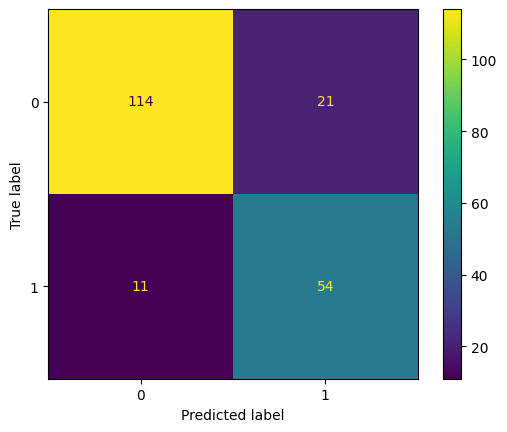

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
CM = confusion_matrix(y_predlinear,y_test)
ConfusionMatrixDisplay(CM).plot()
print(classification_report(y_predlinear,y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       136
           1       0.76      0.89      0.82        64

    accuracy                           0.88       200
   macro avg       0.85      0.88      0.86       200
weighted avg       0.89      0.88      0.88       200



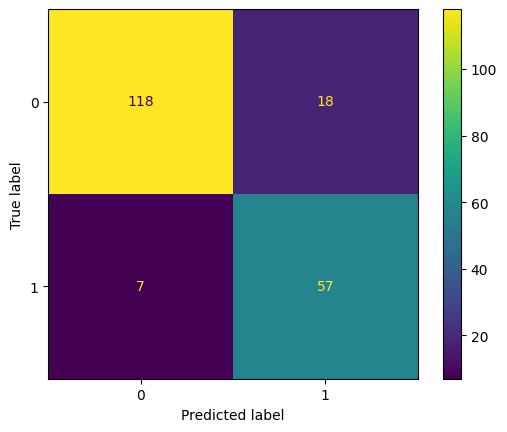

In [85]:
CM = confusion_matrix(y_predpoly,y_test)
ConfusionMatrixDisplay(CM).plot()
print(classification_report(y_predpoly,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       125
           1       0.88      0.88      0.88        75

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200



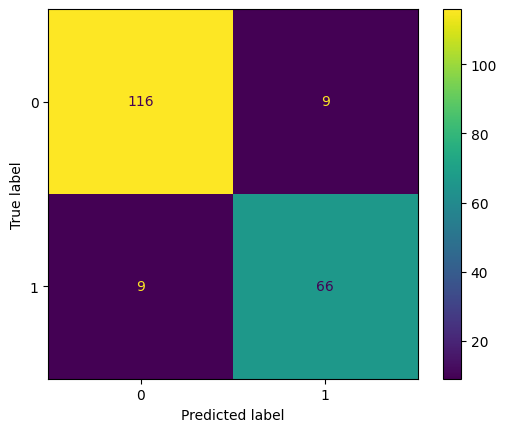

In [86]:
CM = confusion_matrix(y_predrbf,y_test)
ConfusionMatrixDisplay(CM).plot()
print(classification_report(y_predrbf,y_test))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       127
           1       0.65      0.67      0.66        73

    accuracy                           0.75       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.75      0.75      0.75       200



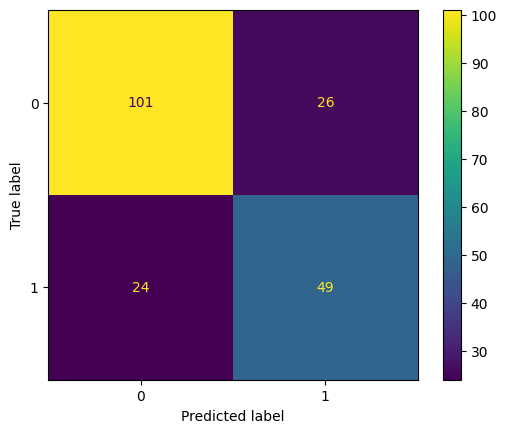

In [84]:
CM = confusion_matrix(y_predsigmoid,y_test)
ConfusionMatrixDisplay(CM).plot()
print(classification_report(y_predsigmoid,y_test))